# Probablemente Python

En este notebook vamos a revisar a través de ejemplos el uso de Python en la solución de algunos problemas de probabilidad.

In [1]:
import numpy as np
import scipy.special
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## Cuenta conmigo

Empezemos con ejemplos que involucran el uso de técnicas de conteo.

*Ejemplo 1. ¿Si tenemos 5 libros en una pequeña repisa, de cuántas formas podemos organizarlos?*

En este caso el orden en que ubicamos los libros importa, de forma que la respuesta es una permutación de n en k, definida como

$$_nP_k = \frac{n!}{(n-k)!}$$

en este caso $n = 5$ y $k = 5$. Por tanto la respuesta es $_5P_5 = 5!$ formas.

In [2]:
#Calculando la permutacion. Primera forma: Usando la funcion perm the scipy.special
N1 = scipy.special.perm(5,5)

#Segunda forma: Usando la función factorial de scipy.special
N2 = scipy.special.factorial(5)

print("El número de formas es ", N1)  #aqui podemos reemplazar a N1 por N2, guarda el mismo resultado

El número de formas es  120.0


*Ejemplo 2. En una clase de 20 estudiantes, dos son seleccionados al azar para que respondan a dos preguntas distintas. ¿Cuál es la probabilidad de que a usted y su amigo el vago los escojan y que a usted le toque responder la pregunta más difícil?*

Si $N$ es el número de formas en que se asignan las tres preguntas a tres estudiantes, entonces

$$N = _{20}P_2$$

y la probabilidad por la que nos preguntan es $1/N$.

In [3]:
#Calculando la permutacion
N = scipy.special.perm(20,2)
print("La probabilidad es ", 1/N)

La probabilidad es  0.00263157894737


*Ejemplo 3. Un red de datos envia paquetes de 64 bits. ¿Cuántos paquetes tienen exactamente cinco ceros?*

Este es un problema de conteo en el que no importa el orden, por tanto la respuesta es una combinación de $n$ en $k$, definida como

$$nCk = \frac{n!}{k!(n-k)!}$$

En este ejemplo, $n = 64$ y $k = 5$.

In [4]:
#Calculando la combinación
N = scipy.special.comb(64,5)
print("Hay %d paquetes de 64 bits con exactamente 5 ceros" % N)

Hay 7624512 paquetes de 64 bits con exactamente 5 ceros


### Distribuciones de probabilidad

Ahora exploremos algunas distribuciones de probabilidad.

*Ejemplo 4. Un sistema de comunicaciones envía 10 bits con una probabilidad de error en la detección de cada bit de 0.4. ¿Cuál es la probabilidad de cometer a lo sumo 3 errores?*

Definimos $X$ como el número de errores en 10 bits. Esta es una variable aleatoria binomial con parámetros $n = 10$ y $p = 0.4$. Primero grafiquemos la distribución de probabilidad (PMF) de $X$.

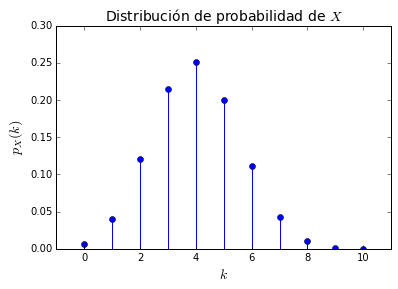

In [5]:
n = 10; p = 0.4;  #Parametros de la distribución binomial
X = scipy.stats.binom(n, p)  #Crea una variable binomial
k = np.arange(n+1);   
#La variable X es un objeto que tiene varios metodos utiles. Uno de ellos es pmf() que calcula la PMF de X
pX = X.pmf(k);    
plt.stem(k, pX);  #graficamos la PMF
plt.xlabel('$k$', fontsize=14);
plt.ylabel('$p_X(k)$', fontsize=14);
plt.xlim((-1, 11))
plt.title('Distribución de probabilidad de $X$', fontsize=14);

Ahora grafiquemos la función de densidad acumulativa de probabilidad (CDF):

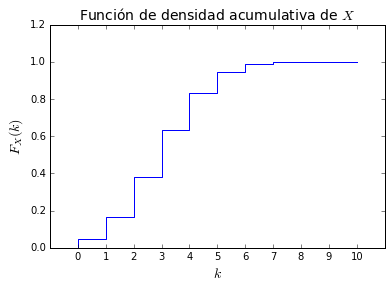

In [6]:
FX = X.cdf(k)  #cdf(k) calcula la CDF de X evaluada en k, esto es P(X <= k)
plt.step(k, FX);  #graficamos la PMF
plt.xlabel('$k$', fontsize=14);
plt.ylabel('$F_X(k)$', fontsize=14);
plt.xlim((-1, 11))
plt.ylim((0, 1.2))
plt.xticks(np.arange(11))
plt.title('Función de densidad acumulativa de $X$', fontsize=14);

La probabilidad del ejemplo es igual $P(X \leq 3) = F_X(3)$:

In [7]:
FX[3]

0.3822806016000001

También podemos calcular la media y la varianza de $X$:

In [8]:
#Media
EX = X.mean()
#Varianza
varX = X.var()

print("La media y varianza de X es %.2f y %.2f, respectivamente" % (EX, varX))

La media y varianza de X es 4.00 y 2.40, respectivamente


Ahora revisamos la distribución normal o Gaussiana.

*Ejemplo 5. Sea $X$ una variable Gaussiana con media 2 y varianza 4. Calcule $P(\lvert X \rvert \leq 2)$*

Definimos

$$Z = \frac{X - 2}{2}$$

$Z$ es una variable aleatoria normal estándar (media cero y varianza unitaria). Tenemos entonces

\begin{align}
P(\lvert X \rvert \leq 2) &= P(-2 \leq X \leq 2)\\
&= P(-2 \leq Z \leq 0)\\
&= P(0 \leq Z \leq 2)\\
&= P(Z \geq 0) - P(Z \geq 2)\\
&= Q(0) - Q(2)
\end{align}

donde $Q(\cdot)$ es la función Q.

In [9]:
muZ = 0; stdZ = 1;  #parametros de la distribución normal: media y desviación estándar
Z = scipy.stats.norm(muZ, stdZ) #creamos la variable normal estándar
Q0 = Z.sf(0); #sf(x) es Q(x). También se conoce como función de supervivencia o de fiabilidad.
Q2 = Z.sf(2);
P = Q0 - Q2;
print("La probilidad es ", P)

La probilidad es  0.477249868052


Este cálculo puede hacerse directamente con $X$ usando su CDF, $F_X(x)$:

\begin{align}
P(\lvert X \rvert \leq 2) &= P(-2 \leq X \leq 2)\\
&= P(X \leq 2) - P(X \leq -2)\\
&= F_X(2) - F_X(-2)
\end{align}

In [10]:
muX = 2; stdX = 2;
X = scipy.stats.norm(muX, stdX)
FX_m2 = X.cdf(-2); #F_X(-2)
FX_2 = X.cdf(2); #F_X(2)
P = FX_2 - FX_m2;
print("La probilidad es ", P)

La probilidad es  0.477249868052
